In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e59812eddd80a035ba092901a601131


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 2 of Set 1 | ahuimanu
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | nizhnevartovsk
Processing Record 11 of Set 1 | pozo colorado
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | saint-georges
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | acari
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | envira
Processing Record 21 of Set 1 | punta de piedra
Processing Record 22

Processing Record 41 of Set 4 | biloela
Processing Record 42 of Set 4 | vila do maio
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | pangody
Processing Record 45 of Set 4 | bosaso
Processing Record 46 of Set 4 | bonavista
Processing Record 47 of Set 4 | hobart
Processing Record 48 of Set 4 | burns lake
Processing Record 49 of Set 4 | altamira
Processing Record 50 of Set 4 | guarapari
Processing Record 1 of Set 5 | metro
Processing Record 2 of Set 5 | marcona
City not found. Skipping...
Processing Record 3 of Set 5 | presidencia roque saenz pena
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | nikolskoye
Processing Record 6 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 5 | manokwari
Processing Record 8 of Set 5 | ostrovnoy
Processing Record 9 of Set 5 | tual
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | stornoway
Processing Record 12 of Set 5 | mchinji
Processing Record 13 of Set

Processing Record 30 of Set 8 | huadian
Processing Record 31 of Set 8 | te anau
Processing Record 32 of Set 8 | tandil
Processing Record 33 of Set 8 | bay roberts
Processing Record 34 of Set 8 | pahrump
Processing Record 35 of Set 8 | port moresby
Processing Record 36 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 37 of Set 8 | seymchan
Processing Record 38 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 39 of Set 8 | nemuro
Processing Record 40 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 41 of Set 8 | la asuncion
Processing Record 42 of Set 8 | ternate
Processing Record 43 of Set 8 | myra
Processing Record 44 of Set 8 | umm kaddadah
Processing Record 45 of Set 8 | seoul
Processing Record 46 of Set 8 | geraldton
Processing Record 47 of Set 8 | amderma
City not found. Skipping...
Processing Record 48 of Set 8 | nynashamn
Processing Record 49 of Set 8 | nioro
Processing Record 50 of Set 8 | kahului
Processing Reco

Processing Record 17 of Set 12 | riyadh
Processing Record 18 of Set 12 | bairiki
Processing Record 19 of Set 12 | kemalpasa
Processing Record 20 of Set 12 | manakara
Processing Record 21 of Set 12 | andenes
Processing Record 22 of Set 12 | kintinku
Processing Record 23 of Set 12 | lasem
Processing Record 24 of Set 12 | winchester
Processing Record 25 of Set 12 | grindavik
Processing Record 26 of Set 12 | soyo
Processing Record 27 of Set 12 | japura
Processing Record 28 of Set 12 | wuwei
Processing Record 29 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 12 | shirokiy
Processing Record 31 of Set 12 | bay city
Processing Record 32 of Set 12 | sanming
Processing Record 33 of Set 12 | colina
Processing Record 34 of Set 12 | ardistan
City not found. Skipping...
Processing Record 35 of Set 12 | aloleng
Processing Record 36 of Set 12 | rundu
Processing Record 37 of Set 12 | conde
Processing Record 38 of Set 12 | queenstown
Processing Record 39 of Set 12 | bandundu

In [7]:
len(city_data)

547

In [8]:
print(city_data)

[{'City': 'Ahuimanu', 'Lat': 21.44, 'Lng': -157.84, 'Max Temp': 87.8, 'Humidity': 54, 'Cloudiness': 75, 'Wind Speed': 13.87, 'Country': 'US', 'Date': '2020-11-08 23:54:29'}, {'City': 'Albany', 'Lat': 42.6, 'Lng': -73.97, 'Max Temp': 55.99, 'Humidity': 58, 'Cloudiness': 0, 'Wind Speed': 1.97, 'Country': 'US', 'Date': '2020-11-08 23:54:29'}, {'City': 'Namibe', 'Lat': -15.2, 'Lng': 12.15, 'Max Temp': 69.31, 'Humidity': 74, 'Cloudiness': 10, 'Wind Speed': 7.25, 'Country': 'AO', 'Date': '2020-11-08 23:54:30'}, {'City': 'Victoria', 'Lat': 22.29, 'Lng': 114.16, 'Max Temp': 73.99, 'Humidity': 45, 'Cloudiness': 61, 'Wind Speed': 7.52, 'Country': 'HK', 'Date': '2020-11-08 23:49:39'}, {'City': 'Upernavik', 'Lat': 72.79, 'Lng': -56.15, 'Max Temp': -4.97, 'Humidity': 77, 'Cloudiness': 0, 'Wind Speed': 10.31, 'Country': 'GL', 'Date': '2020-11-08 23:54:30'}, {'City': 'Tuktoyaktuk', 'Lat': 69.45, 'Lng': -133.04, 'Max Temp': 10.4, 'Humidity': 92, 'Cloudiness': 40, 'Wind Speed': 5.82, 'Country': 'CA', '

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahuimanu,21.44,-157.84,87.80,54,75,13.87,US,2020-11-08 23:54:29
1,Albany,42.60,-73.97,55.99,58,0,1.97,US,2020-11-08 23:54:29
2,Namibe,-15.20,12.15,69.31,74,10,7.25,AO,2020-11-08 23:54:30
3,Victoria,22.29,114.16,73.99,45,61,7.52,HK,2020-11-08 23:49:39
4,Upernavik,72.79,-56.15,-4.97,77,0,10.31,GL,2020-11-08 23:54:30
5,Tuktoyaktuk,69.45,-133.04,10.40,92,40,5.82,CA,2020-11-08 23:54:30
6,Mataura,-46.19,168.86,55.99,75,99,8.99,NZ,2020-11-08 23:52:07
7,Rikitea,-23.12,-134.97,72.95,77,92,16.42,PF,2020-11-08 23:53:46
8,Nizhnevartovsk,60.93,76.55,32.00,99,90,8.95,RU,2020-11-08 23:54:30
9,Pozo Colorado,-23.49,-58.80,86.92,29,50,4.81,PY,2020-11-08 23:54:31


In [10]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ahuimanu,US,2020-11-08 23:54:29,21.44,-157.84,87.80,54,75,13.87
1,Albany,US,2020-11-08 23:54:29,42.60,-73.97,55.99,58,0,1.97
2,Namibe,AO,2020-11-08 23:54:30,-15.20,12.15,69.31,74,10,7.25
3,Victoria,HK,2020-11-08 23:49:39,22.29,114.16,73.99,45,61,7.52
4,Upernavik,GL,2020-11-08 23:54:30,72.79,-56.15,-4.97,77,0,10.31
5,Tuktoyaktuk,CA,2020-11-08 23:54:30,69.45,-133.04,10.40,92,40,5.82
6,Mataura,NZ,2020-11-08 23:52:07,-46.19,168.86,55.99,75,99,8.99
7,Rikitea,PF,2020-11-08 23:53:46,-23.12,-134.97,72.95,77,92,16.42
8,Nizhnevartovsk,RU,2020-11-08 23:54:30,60.93,76.55,32.00,99,90,8.95
9,Pozo Colorado,PY,2020-11-08 23:54:31,-23.49,-58.80,86.92,29,50,4.81


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

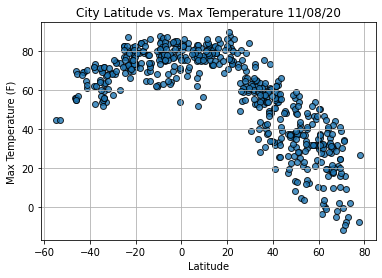

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


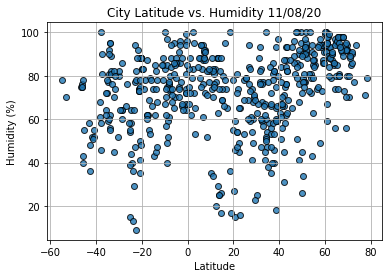

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

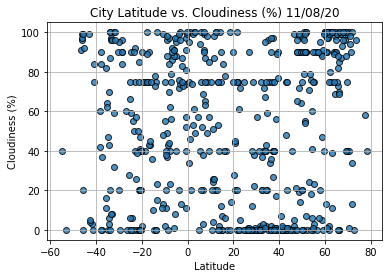

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

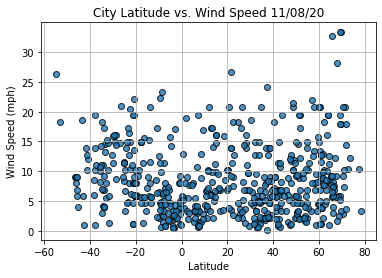

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()